In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,  train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
from sklearn import linear_model
plt.style.use('seaborn')
%matplotlib inline

In [93]:
#importing data 

In [179]:
data = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv')

In [180]:
data

,Data as of,Start_Date,End_Date,Group,Year,Month,MMWR Week,Week_Date,State,COVID19_Deaths,Total_Deaths,Percent_of_Expected_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID19_Deaths,Influenza_Deaths,Pneumonia_Influenza_COVID_Deaths,Footnote
0,4/8/2021,12/29/2019,1/4/2020,By Week,2019/2020,NaN,1.0,1/4/2020,United States,1.0,60163.0,98.0,4105.0,1.0,434.0,4539.0,NaN
1,4/8/2021,1/5/2020,1/11/2020,By Week,2020,NaN,2.0,1/11/2020,United States,0.0,60720.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,4/8/2021,1/12/2020,1/18/2020,By Week,2020,NaN,3.0,1/18/2020,United States,3.0,59350.0,97.0,4064.0,2.0,467.0,4532.0,NaN
3,4/8/2021,1/19/2020,1/25/2020,By Week,2020,NaN,4.0,1/25/2020,United States,1.0,59150.0,99.0,3917.0,0.0,499.0,4417.0,NaN
4,4/8/2021,1/26/2020,2/1/2020,By Week,2020,NaN,5.0,2/1/2020,United States,0.0,58821.0,99.0,3817.0,0.0,481.0,4298.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,4/8/2021,1/1/2020,4/3/2021,By Total,NaN,NaN,NaN,NaN,Washington,4896.0,77490.0,NaN,6377.0,2696.0,161.0,8732.0,NaN
4586,4/8/2021,1/1/2020,4/3/2021,By Total,NaN,NaN,NaN,NaN,West Virginia,2559.0,27976.0,NaN,2897.0,1259.0,68.0,4265.0,NaN
4587,4/8/2021,1/1/2020,4/3/2021,By Total,NaN,NaN,NaN,NaN,Wisconsin,7835.0,76149.0,NaN,5436.0,2506.0,172.0,10933.0,NaN
4588,4/8/2021,1/1/2020,4/3/2021,By Total,NaN,NaN,NaN,NaN,Wyoming,618.0,6761.0,NaN,613.0,278.0,10.0,963.0,NaN


In [181]:
data.columns 

Index(['Data as of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week_Date', 'State', 'COVID19_Deaths', 'Total_Deaths',
       'Percent_of_Expected_Deaths', 'Pneumonia_Deaths',
       'Pneumonia_and_COVID19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_COVID_Deaths', 'Footnote'],
      dtype='object')

In [182]:
data.describe() # Descriptive analysis of the data

,Month,MMWR Week,COVID19_Deaths,Total_Deaths,Percent_of_Expected_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID19_Deaths,Influenza_Deaths,Pneumonia_Influenza_COVID_Deaths
count,864.000000,3564.000000,4111.000000,4.578000e+03,4536.000000,4288.000000,3831.000000,3105.000000,4374.000000
mean,5.500000,23.060606,1054.159572,7.333440e+03,110.942681,877.385728,551.447925,22.179710,1382.171468
std,3.502027,15.937597,11276.377357,8.341891e+04,33.906900,9556.394778,5687.246696,245.977949,15229.431942
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,9.000000,19.000000,4.317500e+02,101.000000,44.000000,12.000000,0.000000,58.000000
50%,4.500000,20.500000,86.000000,1.089000e+03,111.000000,102.000000,44.000000,0.000000,146.500000
75%,8.250000,37.000000,301.000000,2.422000e+03,123.000000,273.000000,158.000000,0.000000,430.750000
max,12.000000,53.000000,540961.000000,4.173167e+06,737.000000,467609.000000,263789.000000,9038.000000,752572.000000


In [183]:
#Testing the reslionship of the data using scatterplot

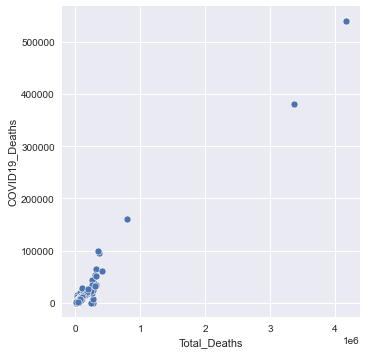

In [184]:
sns.relplot(x='Total_Deaths', y ='COVID19_Deaths', data=data) #relationship between the respondents that died by covid-19 and the total cases of death

In [185]:
data.columns

Index(['Data as of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week_Date', 'State', 'COVID19_Deaths', 'Total_Deaths',
       'Percent_of_Expected_Deaths', 'Pneumonia_Deaths',
       'Pneumonia_and_COVID19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_COVID_Deaths', 'Footnote'],
      dtype='object')

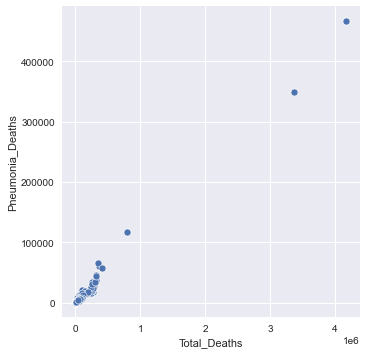

In [186]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_Deaths', data=data) #relationship between the respondents that died by covid 19 and Pneumonia with the total number of death

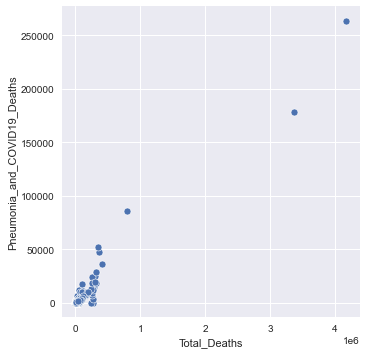

In [187]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_and_COVID19_Deaths', data=data) #relationship between the respondents that died by Pneumonia and the total cases of death

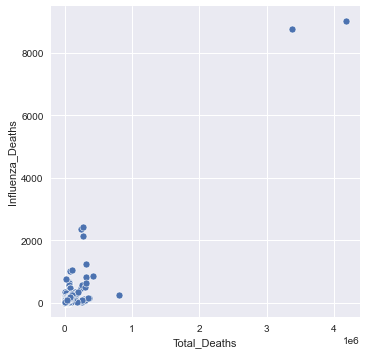

In [188]:
sns.relplot(x='Total_Deaths', y ='Influenza_Deaths', data=data) #Relationship between the respondents that died by Influenza with the total cases of death

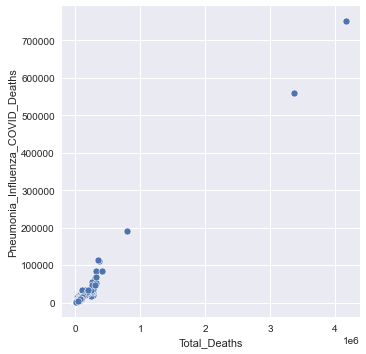

In [189]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_Influenza_COVID_Deaths', data=data) #Relationship between the respondents that died by Pneumonia, Influenza, COVID-19  with the total cases of death

<AxesSubplot:xlabel='Total_Deaths', ylabel='Pneumonia_Influenza_COVID_Deaths'>

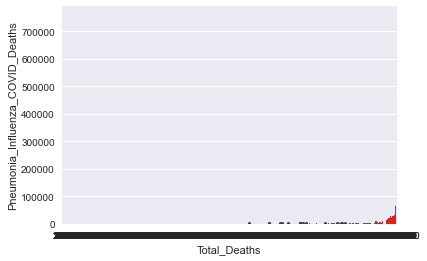

In [190]:
sns.barplot(x='Total_Deaths', y ='Pneumonia_Influenza_COVID_Deaths', data=data, color='r')

In [191]:
data.columns 

Index(['Data as of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week_Date', 'State', 'COVID19_Deaths', 'Total_Deaths',
       'Percent_of_Expected_Deaths', 'Pneumonia_Deaths',
       'Pneumonia_and_COVID19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_COVID_Deaths', 'Footnote'],
      dtype='object')

In [192]:
data.head()

,Data as of,Start_Date,End_Date,Group,Year,Month,MMWR Week,Week_Date,State,COVID19_Deaths,Total_Deaths,Percent_of_Expected_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID19_Deaths,Influenza_Deaths,Pneumonia_Influenza_COVID_Deaths,Footnote
0,4/8/2021,12/29/2019,1/4/2020,By Week,2019/2020,NaN,1.0,1/4/2020,United States,1.0,60163.0,98.0,4105.0,1.0,434.0,4539.0,NaN
1,4/8/2021,1/5/2020,1/11/2020,By Week,2020,NaN,2.0,1/11/2020,United States,0.0,60720.0,97.0,4153.0,0.0,474.0,4627.0,NaN
2,4/8/2021,1/12/2020,1/18/2020,By Week,2020,NaN,3.0,1/18/2020,United States,3.0,59350.0,97.0,4064.0,2.0,467.0,4532.0,NaN
3,4/8/2021,1/19/2020,1/25/2020,By Week,2020,NaN,4.0,1/25/2020,United States,1.0,59150.0,99.0,3917.0,0.0,499.0,4417.0,NaN
4,4/8/2021,1/26/2020,2/1/2020,By Week,2020,NaN,5.0,2/1/2020,United States,0.0,58821.0,99.0,3817.0,0.0,481.0,4298.0,NaN


In [193]:
cols = data.keys
cols

<bound method NDFrame.keys of      Data as of  Start_Date   End_Date     Group       Year  Month  MMWR Week  \
0      4/8/2021  12/29/2019   1/4/2020   By Week  2019/2020    NaN        1.0   
1      4/8/2021    1/5/2020  1/11/2020   By Week       2020    NaN        2.0   
2      4/8/2021   1/12/2020  1/18/2020   By Week       2020    NaN        3.0   
3      4/8/2021   1/19/2020  1/25/2020   By Week       2020    NaN        4.0   
4      4/8/2021   1/26/2020   2/1/2020   By Week       2020    NaN        5.0   
...         ...         ...        ...       ...        ...    ...        ...   
4585   4/8/2021    1/1/2020   4/3/2021  By Total        NaN    NaN        NaN   
4586   4/8/2021    1/1/2020   4/3/2021  By Total        NaN    NaN        NaN   
4587   4/8/2021    1/1/2020   4/3/2021  By Total        NaN    NaN        NaN   
4588   4/8/2021    1/1/2020   4/3/2021  By Total        NaN    NaN        NaN   
4589   4/8/2021    1/1/2020   4/3/2021  By Total        NaN    NaN        NaN  

In [194]:
start = '12/29/2019'
start_date =datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast_dates)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [195]:
unique_states = list(data['State'].unique())
unique_states

['United States',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York City',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Puerto Rico']

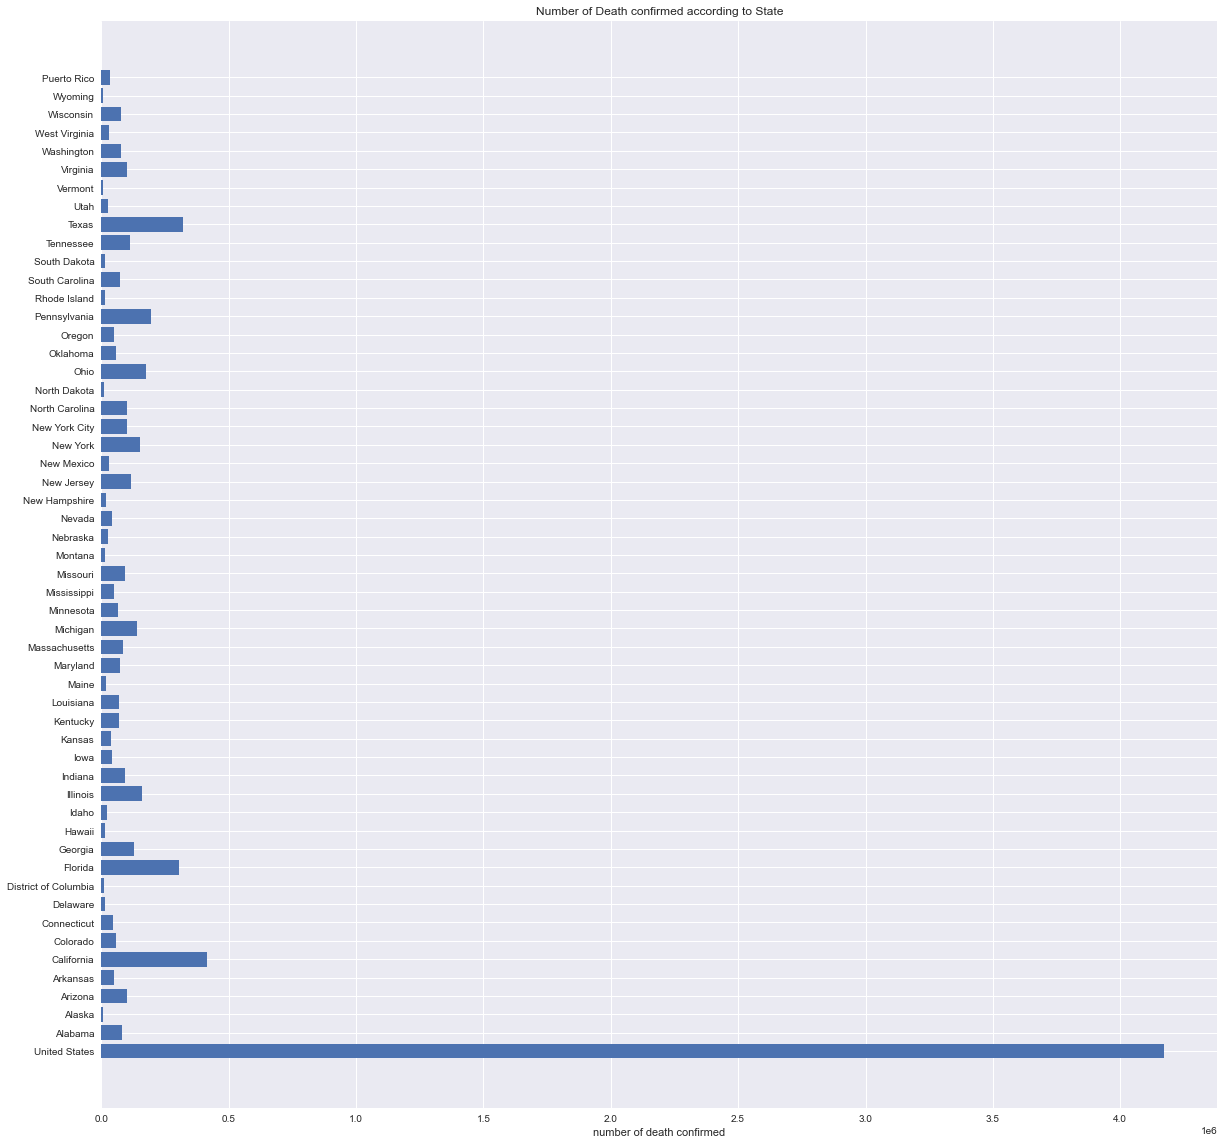

In [196]:
state = data.State
plt.figure(figsize=(20,20))
plt.barh(state, Total_Deaths)
plt.title('Number of Death confirmed according to State')
plt.xlabel('number of death confirmed')
plt.show()

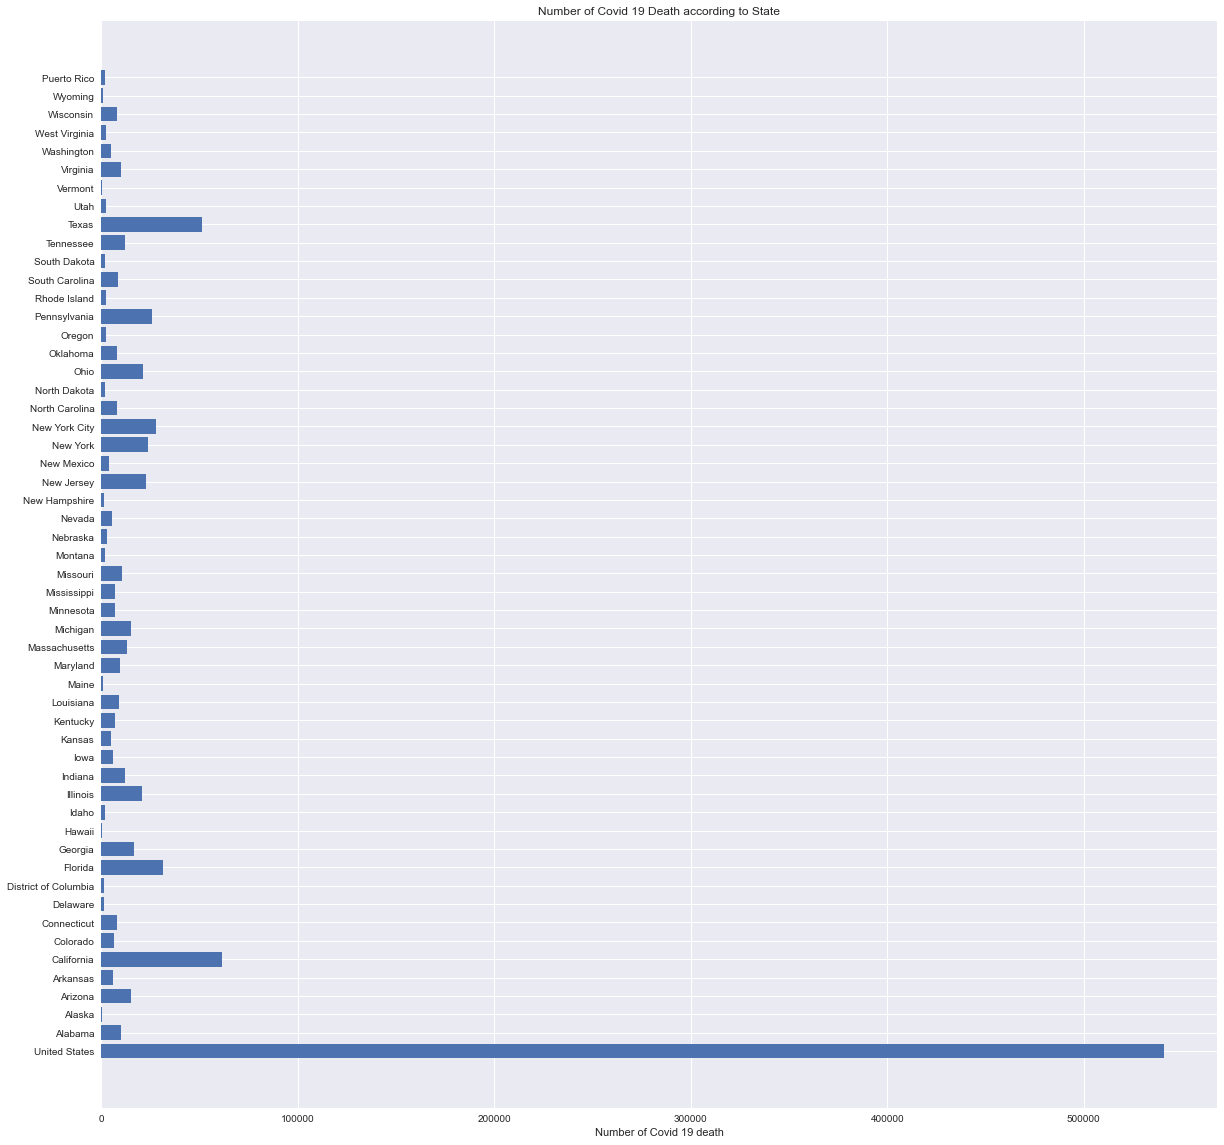

In [197]:
state = data.State
covid = data.COVID19_Deaths  
plt.figure(figsize=(20,20))
plt.barh(state, covid)
plt.title('Number of Covid 19 Death according to State')
plt.xlabel('Number of Covid 19 death')
plt.show()

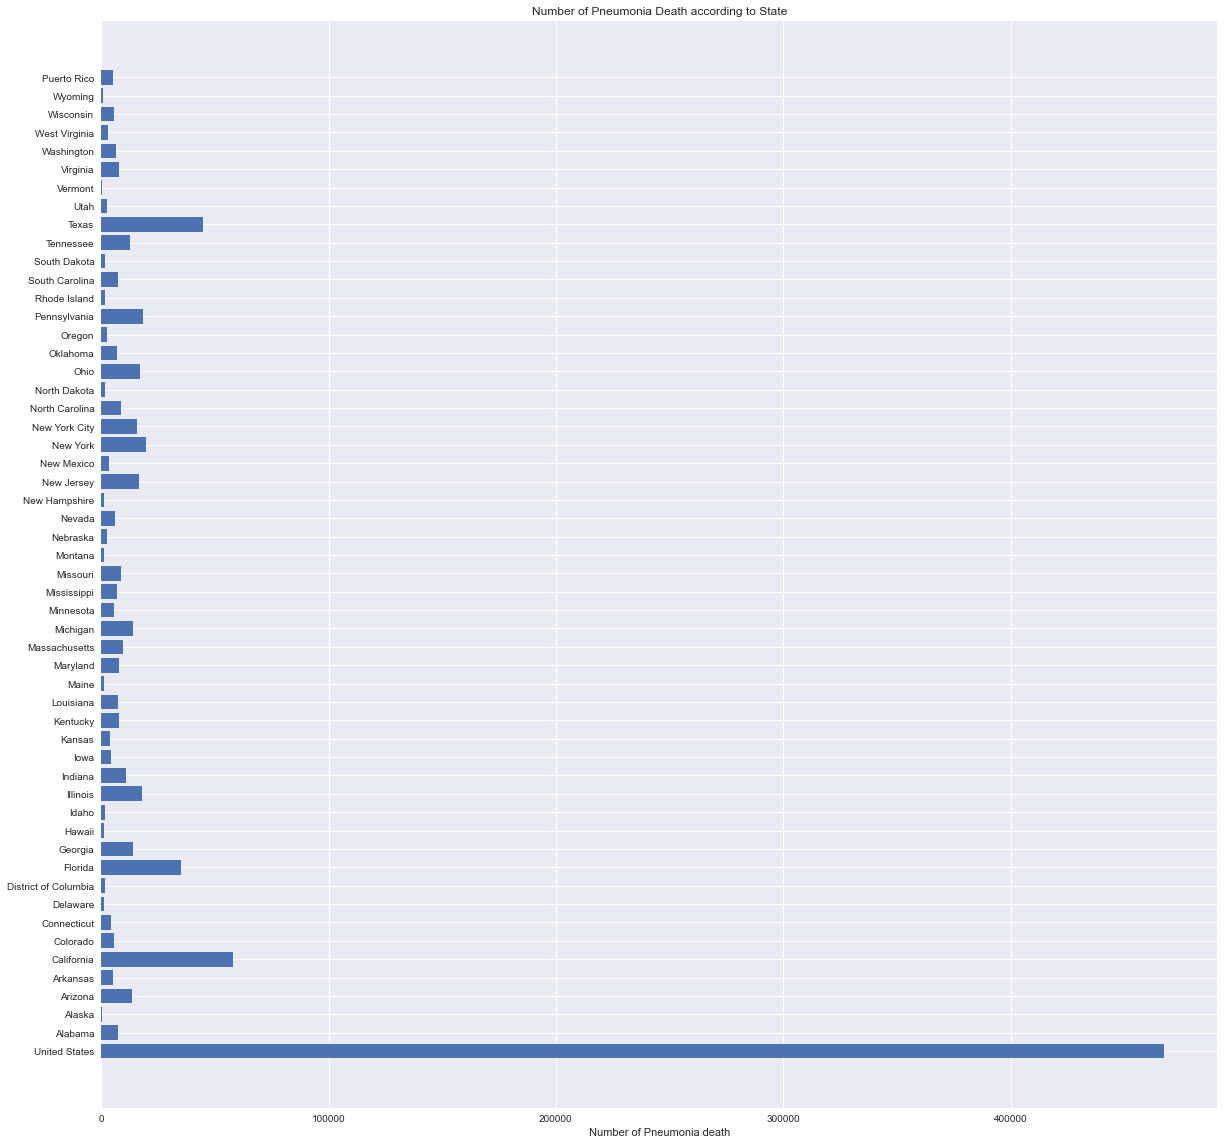

In [198]:
state = data.State
pneumonia = data.Pneumonia_Deaths    
plt.figure(figsize=(20,20))
plt.barh(state, pneumonia)
plt.title('Number of Pneumonia Death according to State')
plt.xlabel('Number of Pneumonia death')
plt.show()

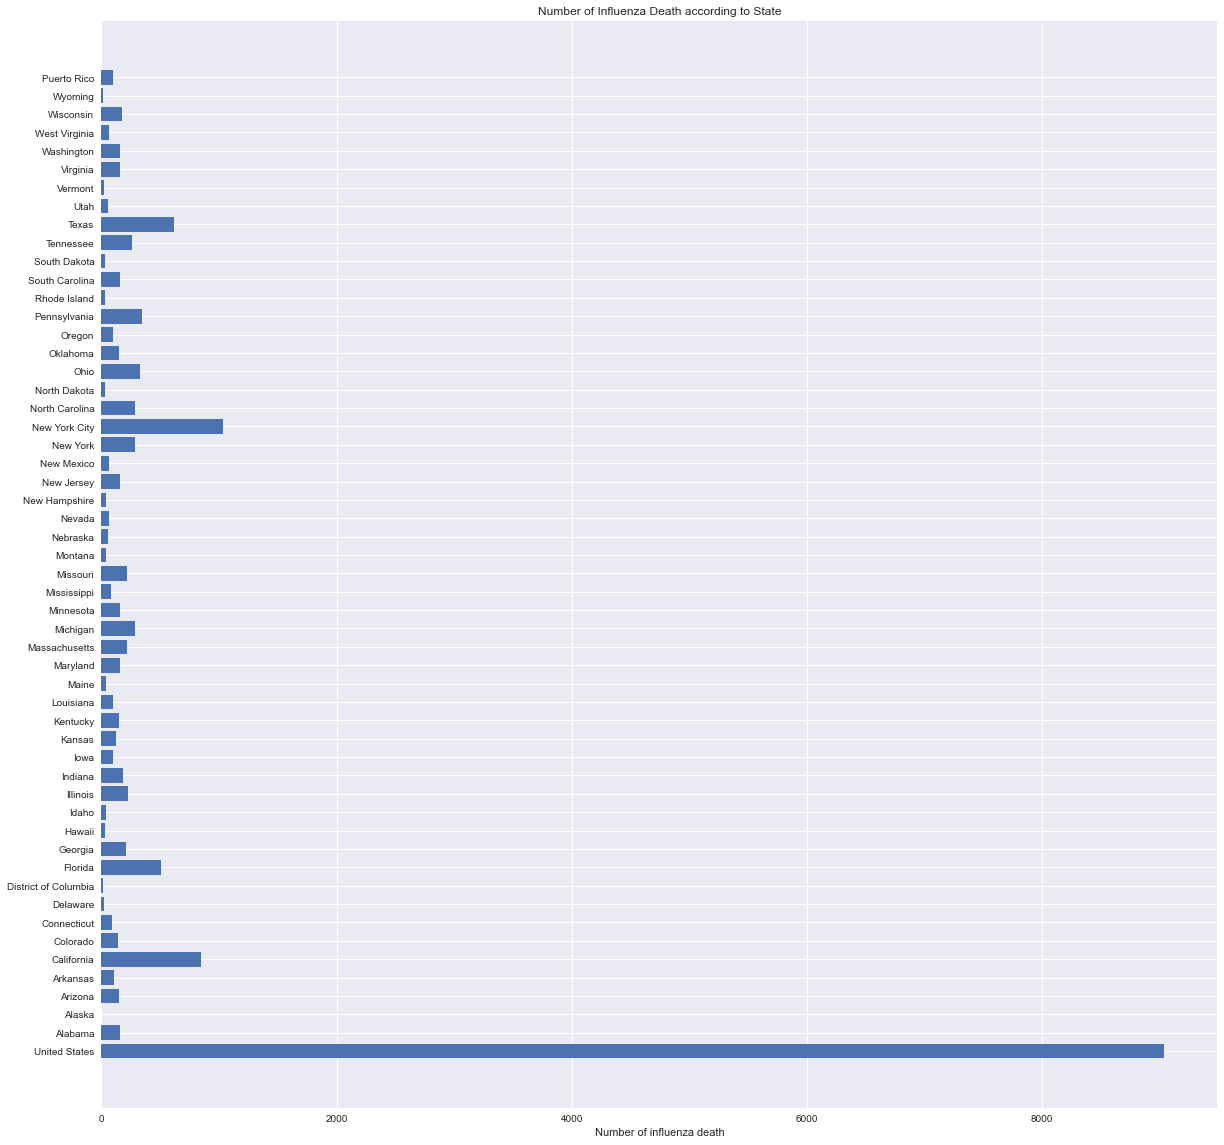

In [199]:
state = data.State
influenza = data.Influenza_Deaths    
plt.figure(figsize=(20,20))
plt.barh(state, influenza)
plt.title('Number of Influenza Death according to State')
plt.xlabel('Number of influenza death')
plt.show()

In [200]:
date = data.Start_Date
days_since_12_29 = np.array([i for i in range(len(date))]).reshape(-1, 1)

In [201]:
days_since_12_29

array([[   0],
       [   1],
       [   2],
       ...,
       [4587],
       [4588],
       [4589]])

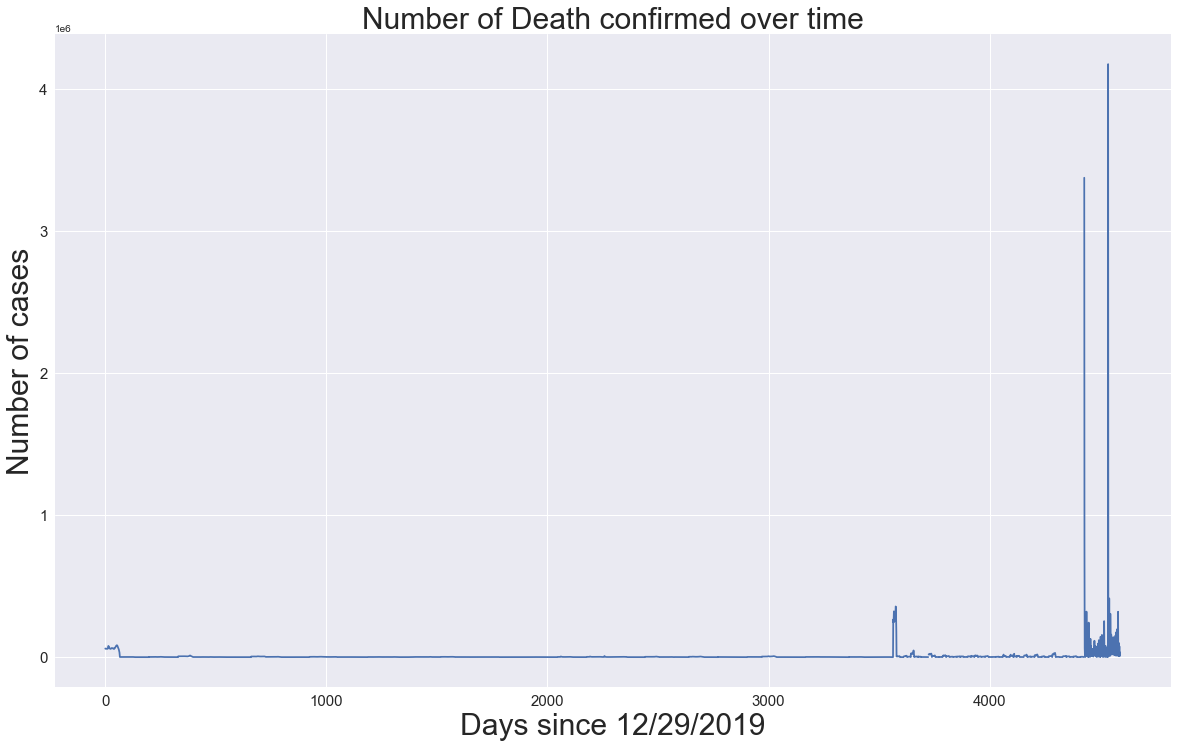

In [202]:

plt.figure(figsize=(20, 12))
plt.plot(days_since_12_29, Total_Deaths)
plt.title('Number of Death confirmed over time', size=30)
plt.xlabel('Days since 12/29/2019', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

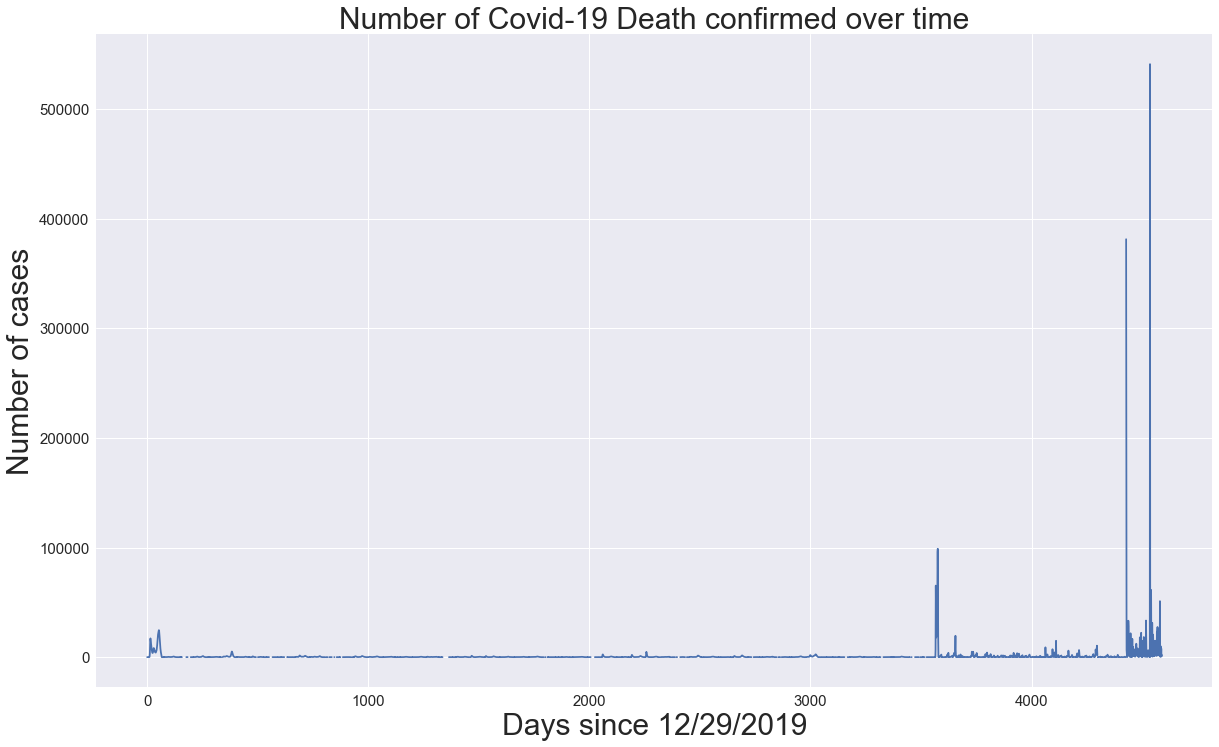

In [203]:
covid = data.COVID19_Deaths
plt.figure(figsize=(20, 12))
plt.plot(days_since_12_29, covid)
plt.title('Number of Covid-19 Death confirmed over time', size=30)
plt.xlabel('Days since 12/29/2019', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

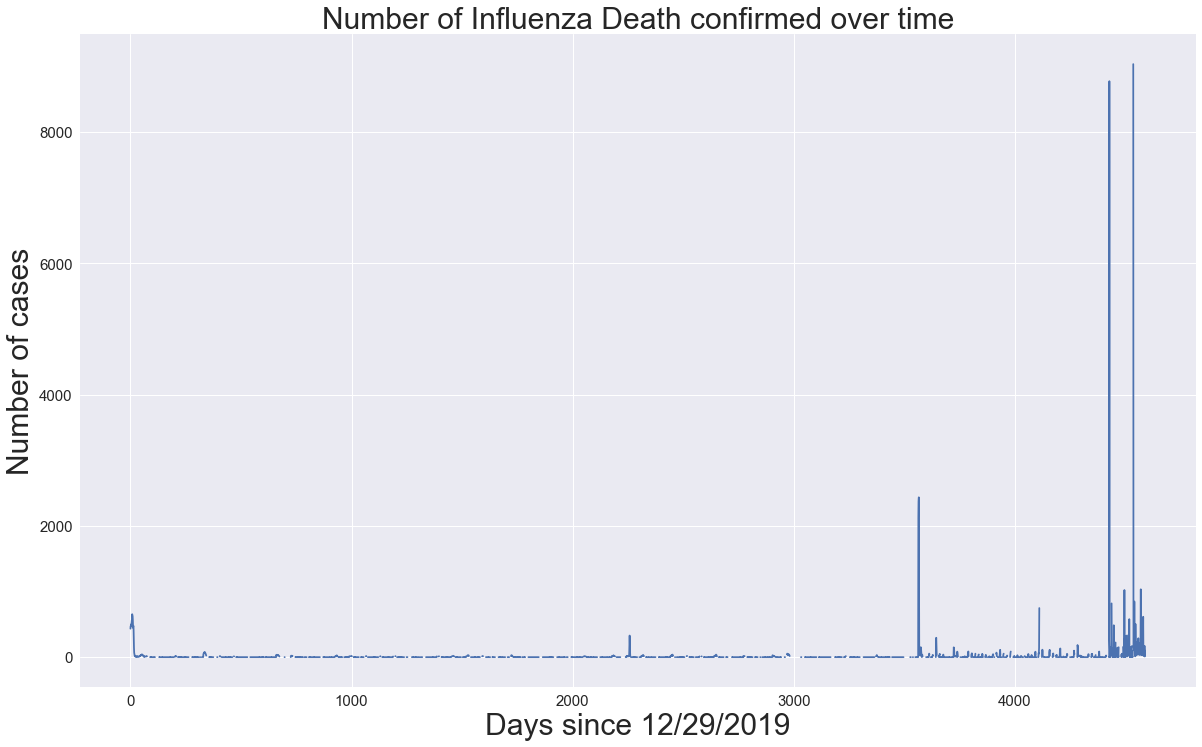

In [204]:
influenza = data.Influenza_Deaths
plt.figure(figsize=(20, 12))
plt.plot(days_since_12_29, influenza)
plt.title('Number of Influenza Death confirmed over time', size=30)
plt.xlabel('Days since 12/29/2019', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

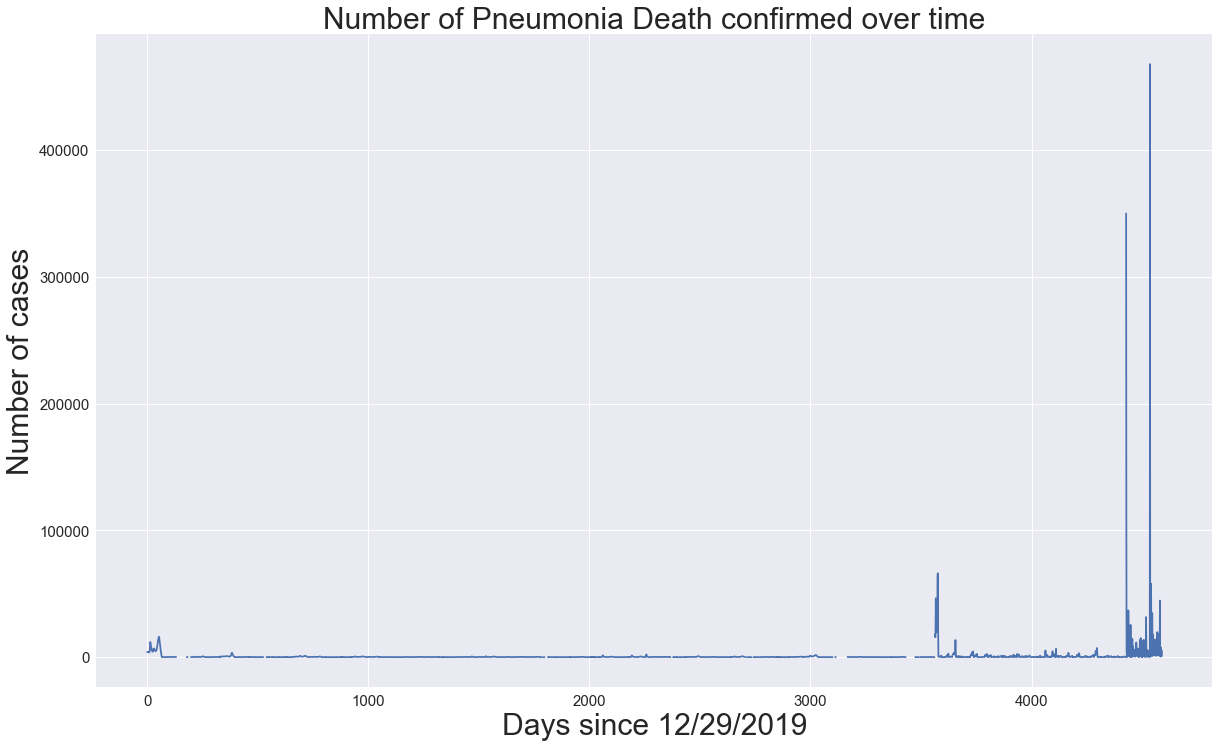

In [205]:
Pneumonia = data.Pneumonia_Deaths
plt.figure(figsize=(20, 12))
plt.plot(days_since_12_29, Pneumonia)
plt.title('Number of Pneumonia Death confirmed over time', size=30)
plt.xlabel('Days since 12/29/2019', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [206]:
data.corr() #correllation analysis of the data

,Month,MMWR Week,COVID19_Deaths,Total_Deaths,Percent_of_Expected_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID19_Deaths,Influenza_Deaths,Pneumonia_Influenza_COVID_Deaths
Month,1.000000,NaN,0.039988,0.017634,0.301587,0.021965,0.035599,-0.132089,0.031943
MMWR Week,NaN,1.000000,0.045372,0.011314,0.309804,0.017933,0.044111,-0.140284,0.028717
COVID19_Deaths,0.039988,0.045372,1.000000,0.980158,0.033928,0.995077,0.998569,0.882057,0.997345
Total_Deaths,0.017634,0.011314,0.980158,1.000000,0.009142,0.993908,0.974146,0.938453,0.991700
Percent_of_Expected_Deaths,0.301587,0.309804,0.033928,0.009142,1.000000,0.018141,0.026682,0.043671,0.026668
Pneumonia_Deaths,0.021965,0.017933,0.995077,0.993908,0.018141,1.000000,0.992717,0.914697,0.999377
Pneumonia_and_COVID19_Deaths,0.035599,0.044111,0.998569,0.974146,0.026682,0.992717,1.000000,0.868871,0.994220
Influenza_Deaths,-0.132089,-0.140284,0.882057,0.938453,0.043671,0.914697,0.868871,1.000000,0.909225
Pneumonia_Influenza_COVID_Deaths,0.031943,0.028717,0.997345,0.991700,0.026668,0.999377,0.994220,0.909225,1.000000


<AxesSubplot:>

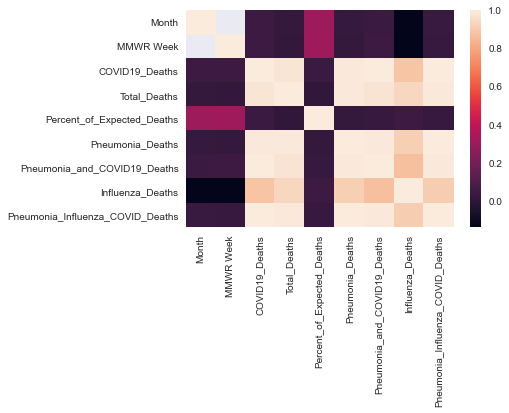

In [214]:
sns.heatmap(data.corr())

In [232]:
#Defining X and Y variable for the Linear resgression model

In [229]:

x =data.drop(['Total_Deaths', 'Data as of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week_Date', 'State', 'Footnote'], axis=1).values
y=data['Total_Deaths'].values

In [234]:
x

array([[1.0000e+00, 9.8000e+01, 4.1050e+03, 1.0000e+00, 4.3400e+02,
        4.5390e+03],
       [0.0000e+00, 9.7000e+01, 4.1530e+03, 0.0000e+00, 4.7400e+02,
        4.6270e+03],
       [3.0000e+00, 9.7000e+01, 4.0640e+03, 2.0000e+00, 4.6700e+02,
        4.5320e+03],
       ...,
       [7.8350e+03,        nan, 5.4360e+03, 2.5060e+03, 1.7200e+02,
        1.0933e+04],
       [6.1800e+02,        nan, 6.1300e+02, 2.7800e+02, 1.0000e+01,
        9.6300e+02],
       [2.0080e+03,        nan, 4.9100e+03, 1.3730e+03, 9.8000e+01,
        5.6360e+03]])

In [231]:
y

array([60163., 60720., 59350., ..., 76149.,  6761., 34157.])

In [227]:
data.columns


Index(['Data as of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week_Date', 'State', 'COVID19_Deaths', 'Total_Deaths',
       'Percent_of_Expected_Deaths', 'Pneumonia_Deaths',
       'Pneumonia_and_COVID19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_COVID_Deaths', 'Footnote'],
      dtype='object')

In [235]:
#Spliting data in Training and Test dataset

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =0)

In [250]:
#Train the model on the training set

In [253]:
lm= linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [248]:

y_pred=ml.predict(x_test)
print(y_pred)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
fit commit